Программа повышения квалификации (научно-педагогических) работников НИУ ВШЭ

# Python для исследователей

*Татьяна Рогович, НИУ ВШЭ*

Максимум 13.5, в ведомость идет максимум 10.

## Домашнее задание 4

In [2]:
import pandas as pd

%matplotlib inline

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1. (0.5 балла)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали). 

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [4]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data.isnull().sum(axis = 0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2. (1 балл)__

Замените в данных все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data[['Glucose','BloodPressure','SkinThickness','Insulin']]=data[['Glucose','BloodPressure','SkinThickness','Insulin']].fillna(data[['Glucose','BloodPressure','SkinThickness','Insulin']].median())
data['BMI']=data['BMI'].fillna(data['BMI'].mean())

__Задание 3. (0.25 балла)__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
sum((data.Age > 50) & (data.Class == 1))

38

__Задание 4. (0.25 балла)__

Найдите трех женщин с наибольшими числом беременностей.

In [7]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data.sort_values(['Pregnancies'], ascending = False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 5. (0.25 балла)__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [12]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
sum((data['Pregnancies'] > 3) & (data['Pregnancies'] < 30))

344

__Задание 6. (0.5 балла)__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
norm_press = sum((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89))
round(norm_press/len(data), 2)*100

19.0

__Задание 7. (0.25 балла)__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data['wasPregnant'] = (data.Pregnancies > 0)*1

__Задание 8. (0.5 балла)__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [11]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data.groupby('wasPregnant').mean().Class*100

wasPregnant
0    34.234234
1    35.007610
Name: Class, dtype: float64

__Задание 9. (1 балл)__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity. Выведите количество женщин в каждой из категорий.

In [42]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
def weight_labeler(x):
    if x < 18.5:
        return 'Underweight'
    if (x >= 18.5) & (x <= 24.9):
        return 'Normal weight' 
    if (x >= 25) & (x <= 29.9):
        return 'Overweight'
    if (x >= 30):
        return 'Obesity'
data['bodyType'] = data.BMI.apply(lambda x: weight_labeler(x))

__Задание 10. (0.5 балла)__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [43]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
health_data = data[(data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89) & (data['BMI'] >=18.5) & (data['BMI'] <=24.9)]
health_data.Class.mean() * 100

10.0

# Визуализация

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

babies = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/babies%20names/babies_all.txt', index_col=0)
babies.tail()

C:\Users\rogov\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,name,sex,number,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


Данные взяты с сайта Social Security и содержат информацию об именах всех новорожденных в США с 1880 года.

https://www.ssa.gov/oact/babynames/limits.html

Данные:

* name - Имя детей
* sex - Пол (мужское или женское)
* number - Количество детей с таким именем
* year - год.

Т.е. последняя строчка читается так: В 2010 году родилось пять мальчиков, которых назвали Zzyzx

__Задание 10. (1 балл)__

Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы входят в наш набор данных?


In [83]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies.year.unique()

2) Какое имя в датасете находится по индексом 121 (от 0)?

In [45]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies.name.iloc[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [46]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[babies.name == 'Aaron'].number.sum()

527668

4) Найдите абсолютную разницу между количеством рожденных мальчиков и девочек за все время.

In [47]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
abs(babies.groupby('sex').number.sum()[0] - babies.groupby('sex').number.sum()[1])

2422447

5) Сколько в датасете девочек по имени John?

In [48]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies[(babies.sex == 'F') & (babies.name == 'John')].number.sum()

21578

__Задание 2. (1.5 балла)__

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys. Т.е. должно получиться два датафрейма, где каждому году соответствует общее количество детей, рожденных в этом году.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы y, показывающей количество детей, рожденных в этот год, должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


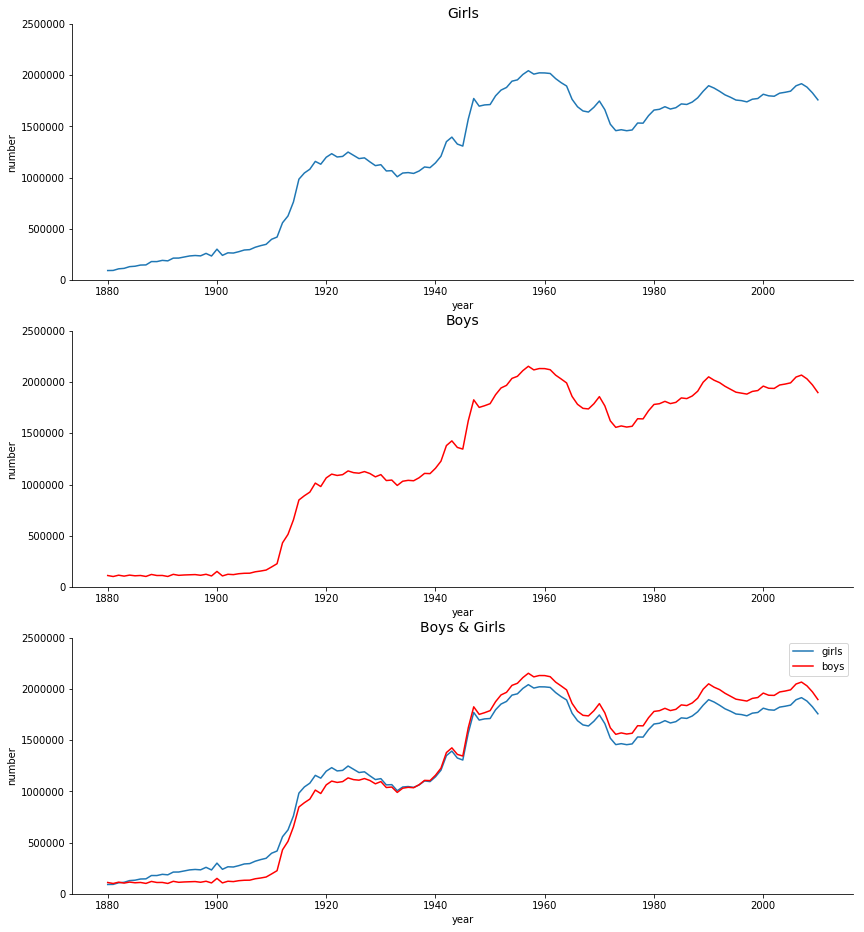

In [14]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# лучшее решение студента курса
babies_girls=babies.groupby(['sex','year']).agg('sum').loc['F']
babies_boys=babies.groupby(['sex','year']).agg('sum').loc['M']
fig,ax = plt.subplots(3,1, figsize=(14,16))

ax[0].plot(babies_girls.index, babies_girls.number)
ax[0].set_title('Girls', fontsize=14)
ax[1].plot(babies_boys.index, babies_boys.number,color='red')
ax[1].set_title('Boys', fontsize=14)
ax[2].plot(babies_girls.index, babies_girls.number,label='girls')
ax[2].plot(babies_boys.index ,babies_boys.number, label='boys',color='red')
ax[2].set_title('Boys & Girls', fontsize=14)
ax[2].legend()
for x in range(3):
    ax[x].spines['top'].set_visible(False) 
    ax[x].spines['right'].set_visible(False) 
    ax[x].set_ylabel('number')
    ax[x].set_xlabel('year')
    ax[x].set_ylim(0,2500000)

__Задание 3 (1.5 балла)__

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные такого формата: сколько детей в каждый год называли таким именем.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время, каждая линия своего цвета.
5. Верхняя и правая границы графиков должны быть невидимы, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на всех графиках.

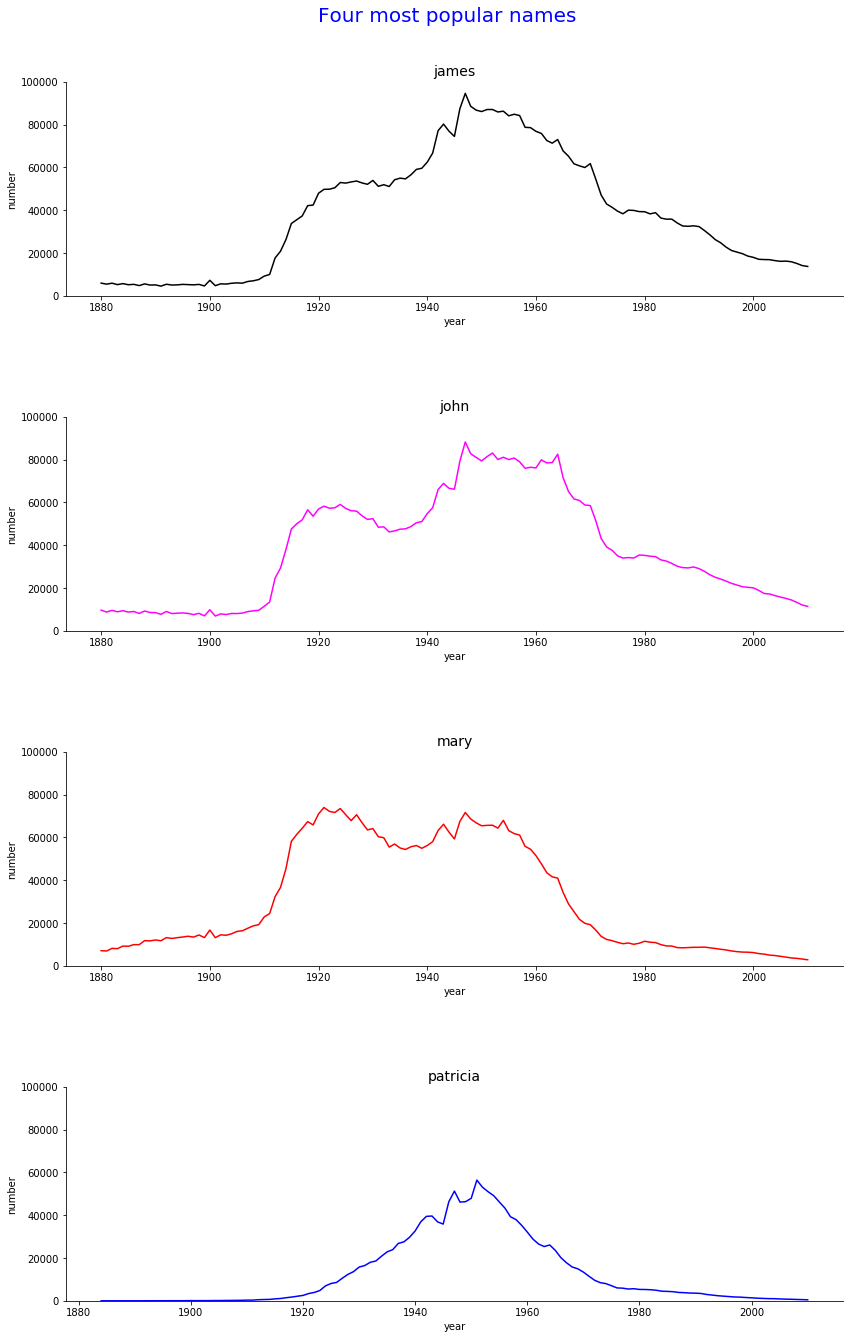

In [15]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# лучшее решение студента курса
babies.groupby(['sex','name']).sum().sort_values(by=['sex','number'],ascending=False).groupby(level=0).head(2)
james = babies.query('sex == "M" & name == "James"')
john = babies.query('sex == "M" & name == "John"')
mary = babies.query('sex == "F" & name == "Mary"')
patricia = babies.query('sex == "F" & name == "Patricia"')

fig,ax = plt.subplots(4,1, figsize=(14,20))
fig.suptitle('Four most popular names',fontsize=20, color='blue')
fig.tight_layout(pad=10.0)

ax[0].plot(james.year, james.number,color='black')
ax[0].set_title('james', fontsize=14)
ax[1].plot(john.year, john.number,color='magenta')
ax[1].set_title('john', fontsize=14)
ax[2].plot(mary.year, mary.number,color='red')
ax[2].set_title('mary', fontsize=14)
ax[3].plot(patricia.year, patricia.number,color='blue')
ax[3].set_title('patricia', fontsize=14)


for x in range(4):
    ax[x].spines['top'].set_visible(False) 
    ax[x].spines['right'].set_visible(False) 
    ax[x].set_ylabel('number')
    ax[x].set_xlabel('year')
    ax[x].set_ylim(0,100000)



__Задание 4. (1.5 балла)__

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для 1900, 1950 и 2000 года (например, babies_first_1900).
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года в отдельном графике.

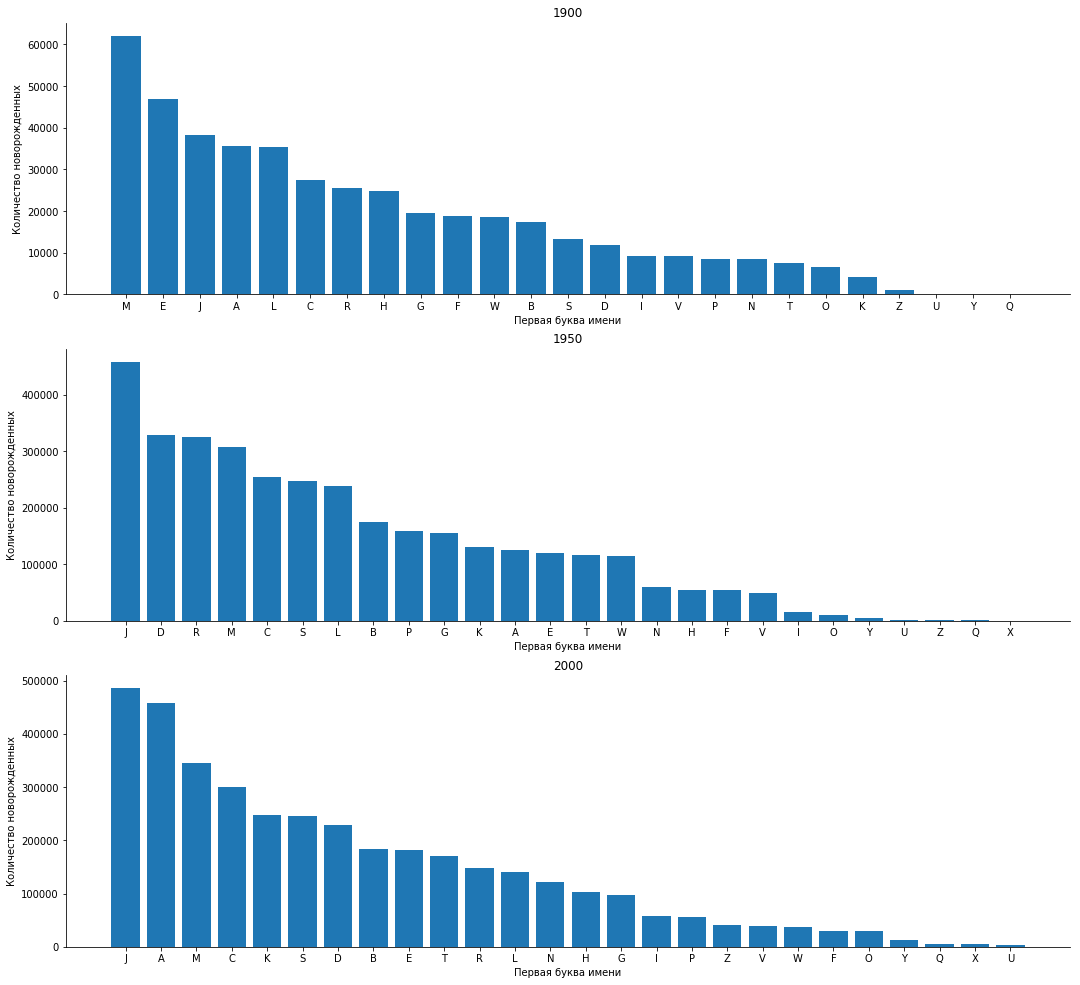

In [16]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['first_letter'] = babies.name.str[0]

babies_first_2000 = babies[babies.year == 2000].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)
babies_first_1950 = babies[babies.year == 1950].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)
babies_first_1900 = babies[babies.year == 1900].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)

fig, ax = plt.subplots(3, 1, figsize=(18, 17))
ax[0].bar(babies_first_1900.first_letter, babies_first_1900.number)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('Количество новорожденных')
ax[0].set_xlabel('Первая буква имени')
ax[0].set_title('1900')

ax[1].bar(babies_first_1950.first_letter, babies_first_1950.number)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('Количество новорожденных')
ax[1].set_xlabel('Первая буква имени')
ax[1].set_title('1950')

ax[2].bar(babies_first_2000.first_letter, babies_first_2000.number)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_ylabel('Количество новорожденных')
ax[2].set_xlabel('Первая буква имени')
ax[2].set_title('2000')

plt.show()

__Задание 5. (3 балла)__

1. Разделите данные на 10 равных временных промежутков (например, 1880 - 1889, 1900 - 1919). Если 10 равных промежутков не получается, то не учитывайте последние несколько лет.
2. Для каждого временного промежутка найдите самые популярные женские и мужские имена (по одному). Итого, у вас должно получиться 20 имен (имена могут повторяться). 
Выведите их значения: в формате "С 1880 до 1889 самым популярным женским именем было Mary, мужским - John" (10 строк одна под другой).
3. Создайте фигуру matplotlib с 2 горизонтальными графиками один под другим.
4. В одном графике постройте линейные тренды за все время для найденных женских имен, а во втором для мужских. Каждое имя своим цветом.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны, у графиков должна быть легенда.
6. Прочитайте ответ на [stackoverflow](https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib), как добавлять на график статические линии. Добавьте на оба графика *тонкие серые* вертикальные линии, которые должны обозначать границы ваших временных промежутков (например, 1900, 1910 и т.д.)

In [17]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['period'] = pd.cut(babies.year, 10)

def min_max_template(interval):
    '''
    Функция возвращает миниальное и максимальное значение интервала
    для заданного интервала
    '''

    return f'С {min(interval)} до {max(interval)}'


babies['partition_by_10'] = babies.groupby('period')['year'].transform(min_max_template)

popular_f = []
popular_m = []
for i in babies.partition_by_10.unique():
    
    period_f = babies[(babies.partition_by_10 == i)
                      & (babies.sex == 'F')].groupby(
                          'name', as_index=False)['number'].sum().sort_values(
                              'number',
                              ascending=False).head(1).name.tolist()[0]
    
    period_m = babies[(babies.partition_by_10 == i)
                      & (babies.sex == 'M')].groupby(
                          'name', as_index=False)['number'].sum().sort_values(
                              'number',
                              ascending=False).head(1).name.tolist()[0]
    print(
        f'{i} самым популярным женским именем было {period_f}, мужским - {period_m}'
    )
    popular_f.append(period_f)
    popular_m.append(period_m)

popular_girls = babies[babies.name.isin(popular_f)].reset_index()
popular_boys = babies[babies.name.isin(popular_m)].reset_index()
pivot_f = popular_girls[popular_girls.sex=='F'].pivot(columns='name', values='number', index='year')
pivot_m = popular_boys[popular_boys.sex=='M'].pivot(columns='name', values='number', index='year')

С 1880 до 1893 самым популярным женским именем было Mary, мужским - John
С 1894 до 1906 самым популярным женским именем было Mary, мужским - John
С 1907 до 1919 самым популярным женским именем было Mary, мужским - John
С 1920 до 1932 самым популярным женским именем было Mary, мужским - Robert
С 1933 до 1945 самым популярным женским именем было Mary, мужским - James
С 1946 до 1958 самым популярным женским именем было Linda, мужским - James
С 1959 до 1971 самым популярным женским именем было Lisa, мужским - Michael
С 1972 до 1984 самым популярным женским именем было Jennifer, мужским - Michael
С 1985 до 1997 самым популярным женским именем было Jessica, мужским - Michael
С 1998 до 2010 самым популярным женским именем было Emily, мужским - Jacob


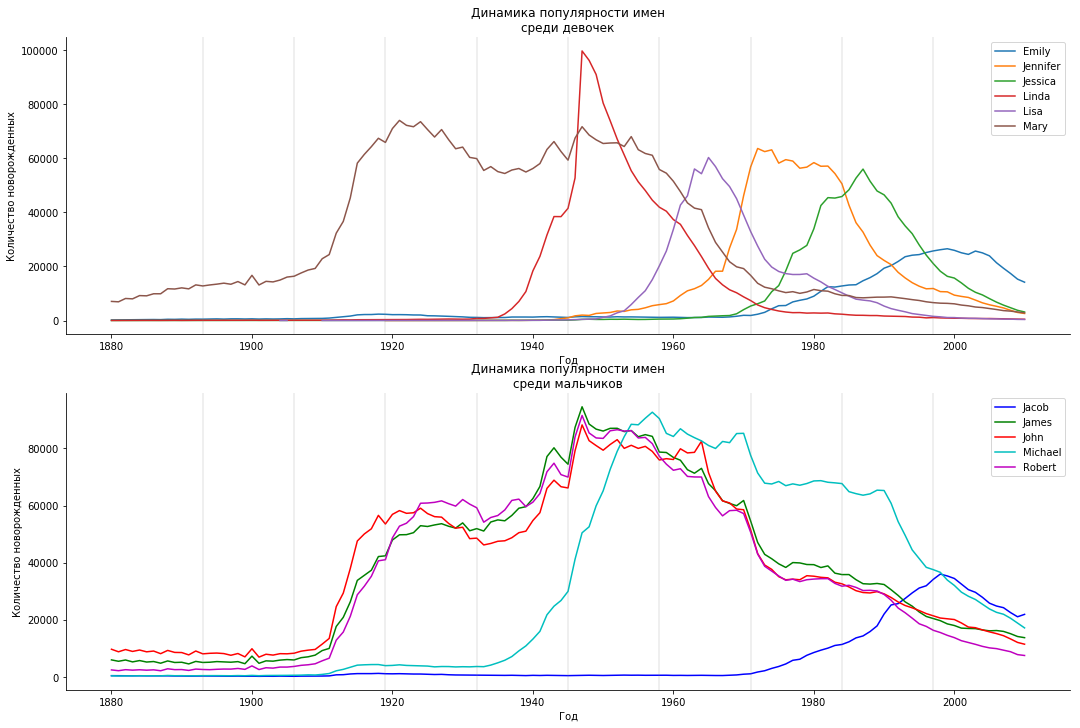

In [18]:
colors_m = ['b', 'g', 'r', 'c', 'm']
coords = babies.groupby('period')['year'].max().tolist()[:-1]

fig, ax = plt.subplots(2, 1, figsize=(18, 12))

for column in pivot_f:
    ax[0].plot(pivot_f.index, pivot_f[column])
    
for i in range(0, 5):
    ax[1].plot(pivot_m.index, pivot_m.iloc[:, i], c=colors_m[i])

ax[0].legend()
ax[0].set_ylabel('Количество новорожденных')
ax[0].set_xlabel('Год')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Динамика популярности имен\nсреди девочек')



ax[1].legend()
ax[1].set_ylabel('Количество новорожденных')
ax[1].set_xlabel('Год')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Динамика популярности имен\nсреди мальчиков')

for xc in coords:
    ax[0].axvline(x=xc, c='gray',lw=0.25)
    ax[1].axvline(x=xc, c='gray',lw=0.25)

plt.show()